이미지 히스토그램

	정의				
		히스토그램: 구간별로 도수를 표현하는 그래프. 분포 확인.			
		이미지 히스토그램은 디지털 이미지에서 픽셀 값의 분포를 그래프로 나타낸 것.			
		그래프에서, 가로축: 픽셀값, 세로축: 픽셀 값의 발생 빈도			
					
	특징	픽셀 값 범위는 0~255			
		그레이스케일(흑백)인 경우, 0:검정, 255: 흰색			
		컬러 이미지: RGB 각 채널별로 픽셀 값 범위 0-255			
					
	히스토그램 해석				
		왼쪽으로 치우침: 어두운 이미지			
		오른쪽으로 치우침: 밝은 이미지			
		중간 집중: 중간톤 이미지			
		고른 분포: 명암 대비가 좋은 이미지			
					
	활용 분야				
		이미지 향상 기법 결정 (히스토그램 평활화: 대비 강조)			
		이미지 분할: 객체와 배경 구분하는 임계값을 결정할 수 있음.			
		특징 추출: 히스토그램 자체가 특징이 될수도 있음. 이미지 분류, 유사 이미지 탐지 등등			
					
	종류, 왜 선택했는지? - 영상 캡쳐본, 디지털 풍화로 이미지가 조금 달라지는데 그건 이미지히스토그램을 크게 변화시키지 않음. 범용성.				
	왜 rgb가 아닌 hsv 를 왜 쓰는지?				
	이미지 비교 머신러닝 방법론은?				
	예전 시트 참조 - 다른 비교 방법				

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [3]:
# df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem1.csv')
df=pd.read_csv('https://raw.githubusercontent.com/yijoohaeun/study_in_noti/main/data/ecommerce.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,565857,84879,ASSORTED COLOUR BIRD ORNAMENT,16,9/7/2011 14:13,1.69,14911.0,EIRE
1,560452,22432,WATERING CAN PINK BUNNY,6,7/19/2011 9:51,1.95,12682.0,France
2,578509,22492,MINI PAINT SET VINTAGE,36,11/24/2011 13:17,0.65,12705.0,Germany
3,579345,22728,ALARM CLOCK BAKELIKE PINK,8,11/29/2011 11:46,3.75,12727.0,France
4,564039,21731,RED TOADSTOOL LED NIGHT LIGHT,12,8/22/2011 12:40,1.65,12645.0,Germany


1. EDA, 이상치 제거 후 F(소비자별 구매빈도), M(소비자별 총 구매액) feature를 새로 생성해서 그 결과값으로 탐색적 분석 실시

,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
InvoiceDate,2115,2948,2017,3093,1499,2932,3219,2750,3583,4333,5517,5542,1461



UnitPrice값이 0인 경우가 존재한다. 제품금액이 0 원인 경우는 이상치로 보고 제거한다.
데이터의 경우 2010년 12월 부터 2011년 12월까지 13개월동안의 데이터이다. 전체기간을 2구간으로 나누어 각각에 대해 고객별 F와 M관련 변수들을 추출한다.
F의 경우 두 구간의 기간별 총 구매 빈도와 총 취소빈도를 만든다. 
M의 경우 두 구간의 기간별 평균 구매량과 평균 구매금액에 대한 데이터를 구한다.
최종적인 데이터는 아래와 같다.



,F_price_order_dum_0,F_price_order_dum_1,F_price_cancel_dum_0,F_price_cancel_dum_1,M_mean_quantity_dum_0,M_mean_quantity_dum_1,M_mean_price_dum_0,M_mean_price_dum_1
CustomerID,,,,,,,,
12348.0,28.0,3.0,0.0,0.0,75.857143,72.333333,53.115714,103.333333
12349.0,0.0,73.0,0.0,0.0,0.000000,8.643836,0.000000,24.076027
12350.0,17.0,0.0,0.0,0.0,11.588235,0.000000,19.670588,0.000000
12352.0,38.0,47.0,10.0,0.0,6.684211,6.000000,41.100263,20.090000
12354.0,58.0,0.0,0.0,0.0,9.137931,0.000000,18.610345,0.000000



생성된 피쳐 데이터의 boxplot을 찍어보면 첫번째와 두번째 컬럼에서 이상치들이 보인다. 95% 백분위이상인 데이터를 걸러낸다. 



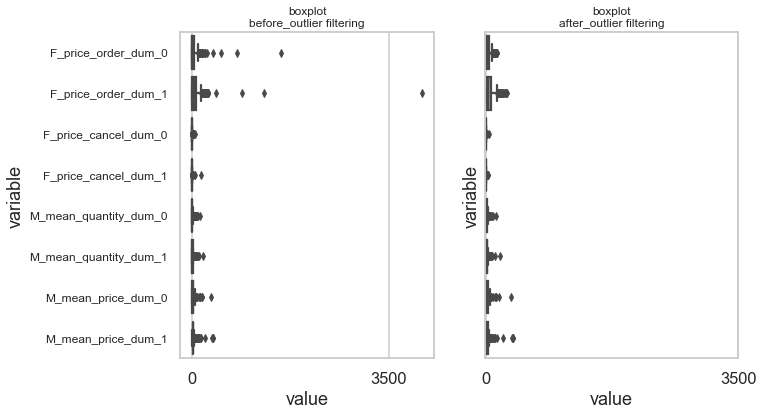

In [48]:
#이상치 제거
df = df[df.UnitPrice !=0].reset_index(drop=True)
df['totalPrice'] = df['Quantity'] *df['UnitPrice']

#날짜 변환
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
display(df.InvoiceDate.astype('str').str.split(' ').str[0].str[:-3].value_counts().sort_index().to_frame().T)

#6,7개월로 기간 분리
date_map = {
    '2010-12':0,
    '2011-01':0,
    '2011-02':0,
    '2011-03':0,
    '2011-04':0,
    '2011-05':0,
    '2011-06':1,
    '2011-07':1,
    '2011-08':1,
    '2011-09':1,
    '2011-10':1,
    '2011-11':1,
    '2011-12':1,
}

df['month_dum'] = df.InvoiceDate.astype('str').str.split(' ').str[0].str[:-3].map(date_map)


# 취소여부 
notcancel = df[df.InvoiceNo.str[0] != 'C'] .reset_index(drop=True)
cancel =df[df.InvoiceNo.str[0] == 'C'].reset_index(drop=True)


f = pd.DataFrame()
m = pd.DataFrame()

# 기간에 따른 구매 내역
f_price = notcancel.groupby(['CustomerID','month_dum'])['UnitPrice'].size().unstack()
f_price.columns = ['F_price_order_dum_' +str(i) for i in range(2)]

cancel_price = cancel.groupby(['CustomerID','month_dum'])['UnitPrice'].size().unstack().fillna(0)
cancel_price.columns = ['F_price_cancel_dum_' +str(i) for i in range(2)]

m_mean_quentity = notcancel.groupby(['CustomerID','month_dum'])['Quantity'].mean().unstack().fillna(0)
m_mean_quentity.columns = ['M_mean_quantity_dum_' +str(i) for i in range(2)]

m_mean_price = notcancel.groupby(['CustomerID','month_dum'])['totalPrice'].mean().unstack().fillna(0)
m_mean_price.columns = ['M_mean_price_dum_' +str(i) for i in range(2)]


t = pd.concat([f_price,cancel_price,m_mean_quentity,m_mean_price],axis=1).fillna(0)

print('''
UnitPrice값이 0인 경우가 존재한다. 제품금액이 0 원인 경우는 이상치로 보고 제거한다.
데이터의 경우 2010년 12월 부터 2011년 12월까지 13개월동안의 데이터이다. 전체기간을 2구간으로 나누어 각각에 대해 고객별 F와 M관련 변수들을 추출한다.
F의 경우 두 구간의 기간별 총 구매 빈도와 총 취소빈도를 만든다. 
M의 경우 두 구간의 기간별 평균 구매량과 평균 구매금액에 대한 데이터를 구한다.
최종적인 데이터는 아래와 같다.
''')

display(t.head())


t_filter = t[(t.F_price_order_dum_0 <= t.F_price_order_dum_0.quantile(0.95))]

fig,ax = plt.subplots(1,2,figsize=(10,6), sharey=True)

t_long = pd.melt(t.reset_index(), id_vars=['CustomerID'])
sns.boxplot(data=t_long, x='value', y='variable', orient='h', ax=ax[0])

t_filter_long = pd.melt(t_filter.reset_index(), id_vars=['CustomerID'])
sns.boxplot(data=t_filter_long, x='value', y='variable', orient='h', ax=ax[1])

ax[0].tick_params(axis='y', labelsize=12) 
ax[0].set_title('boxplot\nbefore_outlier filtering',fontsize=12)
ax[1].set_title('boxplot\nafter_outlier filtering',fontsize=12)
ax[1].set_xticks([0,3500],[0,3500])
ax[0].set_xticks([0,3500],[0,3500])

print('''
생성된 피쳐 데이터의 boxplot을 찍어보면 첫번째와 두번째 컬럼에서 이상치들이 보인다. 95% 백분위이상인 데이터를 걸러낸다. 
''')

2. F, M feature 기반으로 군집분석 실시

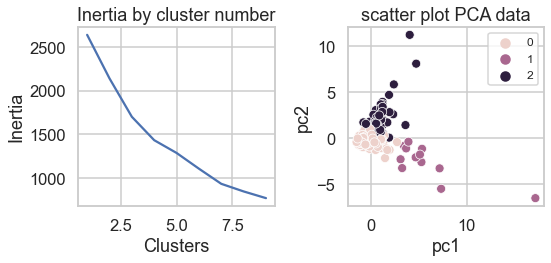

데이터 정규화를 한 후 클러스터 갯수에 따른 inertia를 추출하고 엘보우 기법을 통해 최적의 클러스터를 3개로 결정한다.
두번째 그래프는 정규화한 데이터를 pca를 통해 2개 주성분으로 차원축소한 후 클러스터링 레이블링을 시각화한 모습이다.


In [49]:
sns.set_context('talk')
ss = StandardScaler()
scaled_df = ss.fit_transform(t_filter)

km = KMeans(random_state =1)
km.fit(scaled_df)
km_pred = km.fit_predict(scaled_df)


fig,ax = plt.subplots(1,2,figsize=(8,4))

lst = []
for k in range(1, 10): 
    kmeans = KMeans(n_clusters=k,random_state=1)
    kmeans.fit(scaled_df)
    lst.append(kmeans.inertia_) 

ax[0].plot(range(1, 10), lst)
ax[0].set_xlabel('Clusters')
ax[0].set_ylabel('Inertia')
ax[0].set_title('Inertia by cluster number')



n_cluter =3
km = KMeans(n_clusters=n_cluter,random_state=1)
km_pred = km.fit_predict(scaled_df)


pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit_transform(scaled_df),columns =['pc1','pc2'])
pca_df['cluster_label'] = km_pred
sns.scatterplot(data =pca_df,x = 'pc1',y= 'pc2',hue='cluster_label',ax=ax[1])

fig.tight_layout()
ax[1].set_title('scatter plot PCA data')
ax[1].legend(fontsize=12)
plt.show()

print('데이터 정규화를 한 후 클러스터 갯수에 따른 inertia를 추출하고 엘보우 기법을 통해 최적의 클러스터를 3개로 결정한다.')
print('두번째 그래프는 정규화한 데이터를 pca를 통해 2개 주성분으로 차원축소한 후 클러스터링 레이블링을 시각화한 모습이다.')